# Busca Local


## 📘 1. Introdução

A Busca Local é uma estratégia de otimização que explora diretamente o espaço de soluções, utilizando apenas um estado por vez, sem necessidade de manter uma árvore de busca completa. É especialmente adequada para problemas em que o espaço de estados é muito grande ou não está explicitamente representado como um grafo.

## 📌 Características:
- Estratégia: melhoria iterativa da solução atual, baseada em vizinhança
- Estrutura de dados: vetor ou lista de estados vizinhos
- Completa: Não (pode ficar presa em ótimos locais)
- Ótima: Não (não garante encontrar o ótimo global)
- Complexidade de tempo: depende da função de vizinhança e do número de iterações; tipicamente $O(k⋅n)$, onde $k$ é o número de vizinhos avaliados por iteração e $n$ o número de iterações
- Complexidade de espaço: $O(1)$ (mantém apenas um estado por vez, exceto variantes como Busca Tabu)

## 📈 Aplicações típicas:
- timização contínua e combinatória
- Ajuste de parâmetros
- Planejamento e escalonamento

## 📘 2. Hill Climbing

Hill Climbing, ou Subida da Encosta, é algoritmo guloso que tenta melhorar iterativamente a solução atual escolhendo vizinhos com melhor valor da função objetivo.

In [ ]:
import random

def hill_climbing(funcao_objetivo, dominio, passo=0.01, max_iter=1000):
    """Executa o algoritmo Hill Climbing para maximizar uma função.

    O algoritmo parte de uma solução inicial aleatória dentro do domínio e,
    a cada iteração, avalia um vizinho obtido por uma pequena variação.
    Se o vizinho possuir valor melhor da função objetivo, ele se torna a nova solução.

    Args:
        funcao_objetivo: função que recebe um valor x e retorna um valor escalar.
        dominio: tupla com os limites inferior e superior (min, max) do espaço de busca.
        passo: valor da variação usada para gerar vizinhos.
        max_iter: número máximo de iterações do algoritmo.

    Returns:
        Uma tupla contendo:
            - melhor_x: o valor de x que obtém o melhor valor da função.
            - melhor_valor: o valor máximo encontrado da função objetivo.
    """
    # Geração de solução inicial aleatória dentro do domínio
    x = random.uniform(dominio[0], dominio[1])
    melhor_x = x
    melhor_valor = funcao_objetivo(x)

    for _ in range(max_iter):
        # Geração de vizinho: deslocamento positivo ou negativo
        direcao = random.choice([-1, 1])
        vizinho = x + direcao * passo

        # Verifica se o vizinho está dentro do domínio permitido
        if dominio[0] <= vizinho <= dominio[1]:
            valor_vizinho = funcao_objetivo(vizinho)

            # Atualiza se o vizinho for melhor
            if valor_vizinho > melhor_valor:
                x = vizinho
                melhor_x = vizinho
                melhor_valor = valor_vizinho

    return melhor_x, melhor_valor


## 📘 3. Busca Tabu

A Busca Tabu, ou Tabu Search, utiliza uma memória (lista tabu) para evitar voltar a soluções já visitadas recentemente, incentivando a exploração do espaço de busca.

In [ ]:
from collections import deque
import random

def busca_tabu(funcao_objetivo, dominio, passo=0.05, tamanho_tabu=20, max_iter=500):
    """Executa o algoritmo de Busca Tabu para maximização de uma função.

    A Busca Tabu é uma metaheurística baseada em busca local, que utiliza uma
    memória curta (lista tabu) para evitar revisitar soluções recentes, incentivando
    a exploração de novas regiões do espaço de busca.

    Args:
        funcao_objetivo: função que recebe um valor x e retorna um valor escalar.
        dominio: tupla (min, max) definindo os limites do espaço de busca.
        passo: distância utilizada para gerar os candidatos vizinhos.
        tamanho_tabu: número máximo de elementos armazenados na lista tabu.
        max_iter: número máximo de iterações do algoritmo.

    Returns:
        Uma tupla contendo:
            - melhor_x: o valor de x com melhor avaliação da função objetivo.
            - melhor_valor: valor máximo encontrado da função objetivo.
    """
    # Inicialização da solução corrente e da melhor solução
    x = random.uniform(dominio[0], dominio[1])
    melhor_x = x
    melhor_valor = funcao_objetivo(x)

    # Lista tabu como fila com tamanho limitado
    lista_tabu = deque([x], maxlen=tamanho_tabu)

    for _ in range(max_iter):
        # Geração de múltiplos candidatos vizinhos
        deltas = [passo * d for d in range(-10, 11) if d != 0]
        candidatos = [x + delta for delta in deltas]

        # Filtra candidatos dentro do domínio e fora da lista tabu
        candidatos_validos = [c for c in candidatos if dominio[0] <= c <= dominio[1] and c not in lista_tabu]

        if not candidatos_validos:
            break  # encerra se não houver candidatos válidos

        # Seleciona o melhor candidato (não tabu)
        melhor_candidato = max(candidatos_validos, key=funcao_objetivo)
        valor_candidato = funcao_objetivo(melhor_candidato)

        # Atualiza a melhor solução global se aplicável
        if valor_candidato > melhor_valor:
            melhor_x = melhor_candidato
            melhor_valor = valor_candidato

        # Atualiza estado atual e insere na lista tabu
        x = melhor_candidato
        lista_tabu.append(x)

    return melhor_x, melhor_valor


# 📘 4. Simulated Annealing

O Simulated Annealing, ou Recozimento Simulado, é inspirado no processo físico de recozimento, permite aceitar soluções piores com uma certa probabilidade que diminui com o tempo, escapando de ótimos locais.

In [ ]:
import math
import random

def simulated_annealing(funcao_objetivo, dominio, T_max=1.0, T_min=1e-5, alfa=0.99, max_iter=1000):
    """Executa o algoritmo Simulated Annealing para maximizar uma função.

    O Simulated Annealing é uma metaheurística inspirada no processo de
    resfriamento térmico de sólidos. Permite aceitar soluções piores com uma
    certa probabilidade que decresce com o tempo, facilitando a saída de ótimos locais.

    Args:
        funcao_objetivo: função que recebe um valor x e retorna um valor escalar.
        dominio: tupla (min, max) indicando o intervalo do espaço de busca.
        T_max: temperatura inicial (valor de controle para a aceitação de piores soluções).
        T_min: temperatura mínima (critério de parada baseado em temperatura).
        alfa: fator de resfriamento (decaimento multiplicativo da temperatura).
        max_iter: número máximo de iterações permitidas.

    Returns:
        Uma tupla contendo:
            - melhor_x: o valor de x com a melhor avaliação da função objetivo.
            - melhor_valor: valor máximo encontrado da função objetivo.
    """
    # Inicialização da solução corrente
    x = random.uniform(dominio[0], dominio[1])
    melhor_x = x
    melhor_valor = funcao_objetivo(x)

    T = T_max

    for _ in range(max_iter):
        # Geração de vizinho aleatório com pequena perturbação
        vizinho = x + random.uniform(-0.1, 0.1)

        # Verifica se o vizinho está no domínio
        if dominio[0] <= vizinho <= dominio[1]:
            valor_atual = funcao_objetivo(x)
            valor_vizinho = funcao_objetivo(vizinho)
            delta = valor_vizinho - valor_atual

            # Critério de aceitação: sempre aceita se for melhor;
            # senão, aceita com uma probabilidade baseada na temperatura
            if delta > 0 or random.random() < math.exp(delta / T):
                x = vizinho
                if valor_vizinho > melhor_valor:
                    melhor_x = vizinho
                    melhor_valor = valor_vizinho

        # Atualização da temperatura
        T = T * alfa
        if T < T_min:
            break

    return melhor_x, melhor_valor


# 📘 5. Exemplo Visual

## 5.1 Hill Climbing

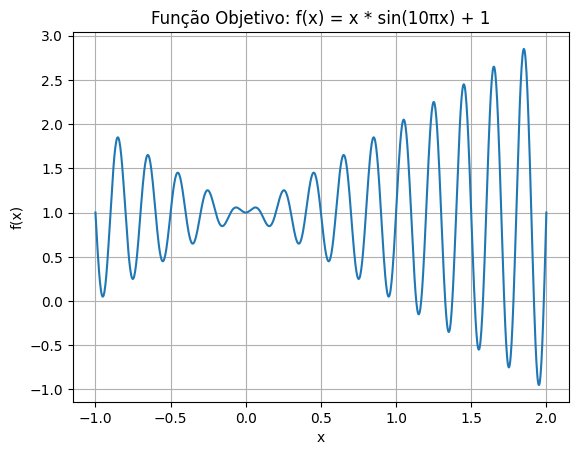

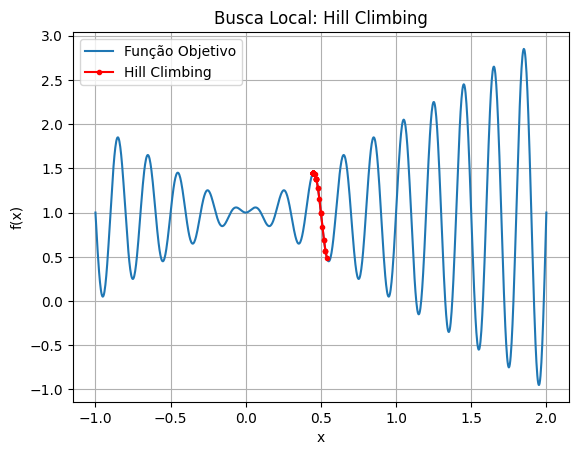

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import deque

# Função objetivo: f(x) = x * sin(10 * pi * x) + 1, definida em x ∈ [-1, 2]
def funcao_objetivo(x):
    return x * np.sin(10 * np.pi * x) + 1

# Domínio da função
dominio = (-1, 2)

# Plot da função
x_vals = np.linspace(dominio[0], dominio[1], 1000)
y_vals = funcao_objetivo(x_vals)

plt.plot(x_vals, y_vals)
plt.title("Função Objetivo: f(x) = x * sin(10πx) + 1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

def hill_climbing(objetivo, dominio, passo=0.01, max_iter=1000):
    x = random.uniform(*dominio)
    melhor = x
    melhor_valor = objetivo(x)
    historico = [(x, melhor_valor)]

    for _ in range(max_iter):
        candidato = x + random.choice([-1, 1]) * passo
        if dominio[0] <= candidato <= dominio[1]:
            valor_candidato = objetivo(candidato)
            if valor_candidato > melhor_valor:
                x = candidato
                melhor = candidato
                melhor_valor = valor_candidato
        historico.append((x, objetivo(x)))

    return melhor, melhor_valor, historico

sol, val, hist = hill_climbing(funcao_objetivo, dominio)
hx, hy = zip(*hist)

plt.plot(x_vals, y_vals, label="Função Objetivo")
plt.plot(hx, hy, 'r.-', label="Hill Climbing")
plt.title("Busca Local: Hill Climbing")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

## 5.2 Busca Tabu

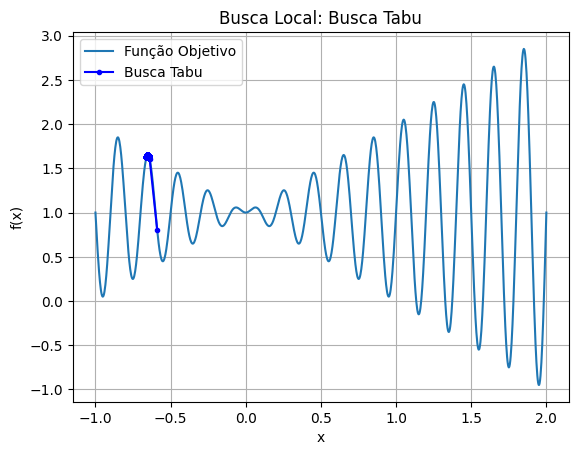

In [ ]:
def busca_tabu(objetivo, dominio, passo=0.05, tamanho_tabu=20, max_iter=500):
    x = random.uniform(*dominio)
    melhor = x
    melhor_valor = objetivo(x)
    lista_tabu = deque([x], maxlen=tamanho_tabu)
    historico = [(x, melhor_valor)]

    for _ in range(max_iter):
        candidatos = [x + passo * delta for delta in np.linspace(-1, 1, 20)]
        candidatos = [c for c in candidatos if dominio[0] <= c <= dominio[1] and c not in lista_tabu]
        if not candidatos:
            break
        candidato = max(candidatos, key=objetivo)
        lista_tabu.append(candidato)
        if objetivo(candidato) > melhor_valor:
            melhor = candidato
            melhor_valor = objetivo(candidato)
        x = candidato
        historico.append((x, objetivo(x)))

    return melhor, melhor_valor, historico

sol, val, hist = busca_tabu(funcao_objetivo, dominio)
hx, hy = zip(*hist)

plt.plot(x_vals, y_vals, label="Função Objetivo")
plt.plot(hx, hy, 'b.-', label="Busca Tabu")
plt.title("Busca Local: Busca Tabu")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

## 5.3 Simulated Annealing

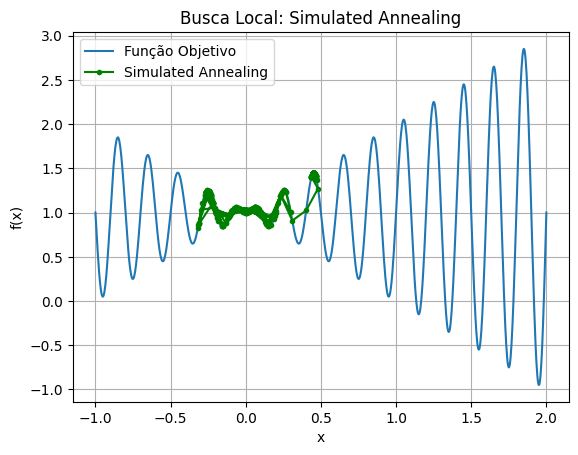

In [ ]:
def simulated_annealing(objetivo, dominio, T_max=1.0, T_min=1e-5, alpha=0.99, max_iter=1000):
    x = random.uniform(*dominio)
    melhor = x
    melhor_valor = objetivo(x)
    T = T_max
    historico = [(x, melhor_valor)]

    for _ in range(max_iter):
        candidato = x + random.uniform(-0.1, 0.1)
        if dominio[0] <= candidato <= dominio[1]:
            delta = objetivo(candidato) - objetivo(x)
            if delta > 0 or random.random() < np.exp(delta / T):
                x = candidato
                if objetivo(x) > melhor_valor:
                    melhor = x
                    melhor_valor = objetivo(x)
        historico.append((x, objetivo(x)))
        T *= alpha
        if T < T_min:
            break

    return melhor, melhor_valor, historico

sol, val, hist = simulated_annealing(funcao_objetivo, dominio)
hx, hy = zip(*hist)

plt.plot(x_vals, y_vals, label="Função Objetivo")
plt.plot(hx, hy, 'g.-', label="Simulated Annealing")
plt.title("Busca Local: Simulated Annealing")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()